##IMPORT LIBRARY

In [89]:
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import itertools
#Scikit-Learn for Modeling;skclearn
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
!pip install fbprophet
!conda install -c conda-forge fbprophet
from prophet import Prophet
plt.style.use('ggplot')

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.8 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.2-py3-none-any.w

In [90]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

##INPUT DATA FILE

In [91]:
Store_df = pd.read_csv('/content/rossman_store.csv')
Train_df = pd.read_csv('/content/rossman_train.csv')

<ipython-input-91-eadea16e5d04>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_df = pd.read_csv('/content/rossman_train.csv')


##EDA

###Overview about dataset

In [92]:
Train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [93]:
Train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [94]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [95]:
Store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [96]:
Store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [97]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Data Wrangling and Exploration:

###A closer look at the Train dataset

In [98]:
#Xem tỷ lệ của các giá trị 0 và số lượng hàng
Train_df.count(0)/Train_df.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

In [99]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(Train_df[(Train_df.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(Train_df[(Train_df.Open == 0) & (Train_df.SchoolHoliday == 1)&(Train_df.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(Train_df[(Train_df.Open == 0) &
         ((Train_df.StateHoliday == 'a') |
          (Train_df.StateHoliday == 'b') |
          (Train_df.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(Train_df[(Train_df.Open == 0) &
         (Train_df.StateHoliday == "0")
         &(Train_df.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 2263 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 121482 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



In [100]:
Train_df=Train_df.drop(Train_df[(Train_df.Open == 0) & (Train_df.Sales == 0)].index)

In [101]:
Train_df = Train_df.reset_index(drop=True)

In [102]:
print ("Our new training set has now {} rows ".format(Train_df.shape[0]))

Our new training set has now 844392 rows 


Descriptive statistics

In [103]:
Train_df.Sales.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [104]:
Train_df=Train_df.drop(Train_df[(Train_df.Open == 1) & (Train_df.Sales == 0)].index)
Train_df = Train_df.reset_index(drop=True)

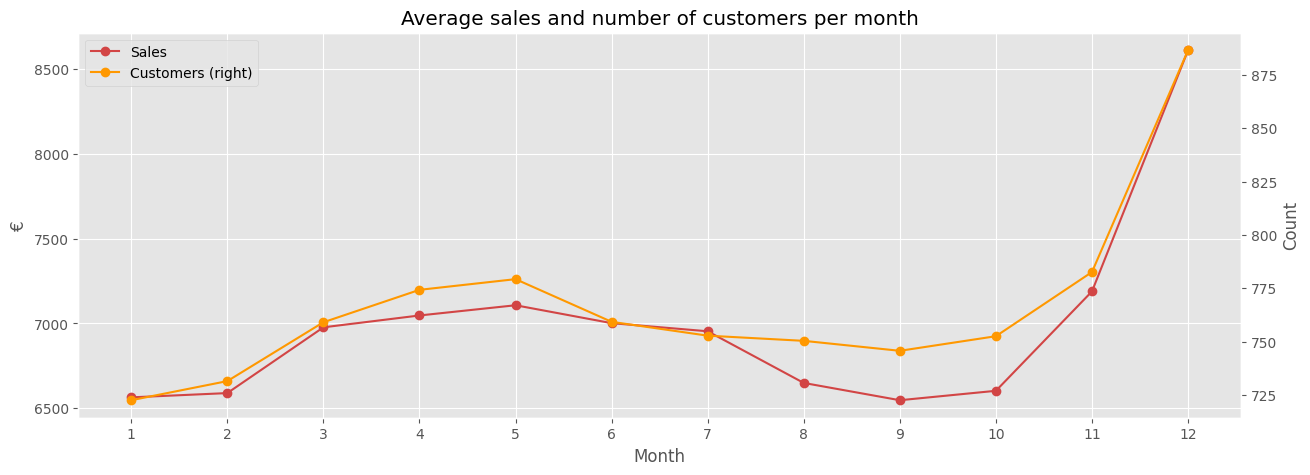

In [105]:
# Convert 'Date' column to datetime type
Train_df['Date'] = pd.to_datetime(Train_df['Date'])
Train_df['Month'] = Train_df.Date.dt.month
ax = Train_df.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o', color=["#D24545", "#FF9800"])
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,13))
plt.title('Average sales and number of customers per month');

{'Mean': 6955.959133664481, 'Median': 6369.0}

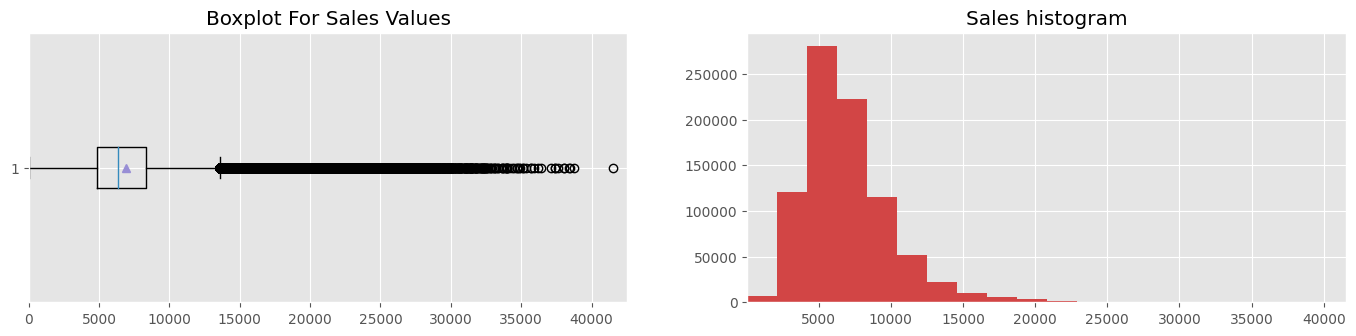

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(Train_df.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(Train_df["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(Train_df.Sales, cumulative=False, bins=20, color='#D24545')
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(Train_df.Sales), max(Train_df.Sales)))

{"Mean":np.mean(Train_df.Sales),"Median":np.median(Train_df.Sales)}

In [107]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(Train_df[Train_df.Sales>14000].count()[0]/Train_df.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(Train_df[Train_df.Sales==0].count()[0]/Train_df.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


In [108]:
Train_df.Customers.describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

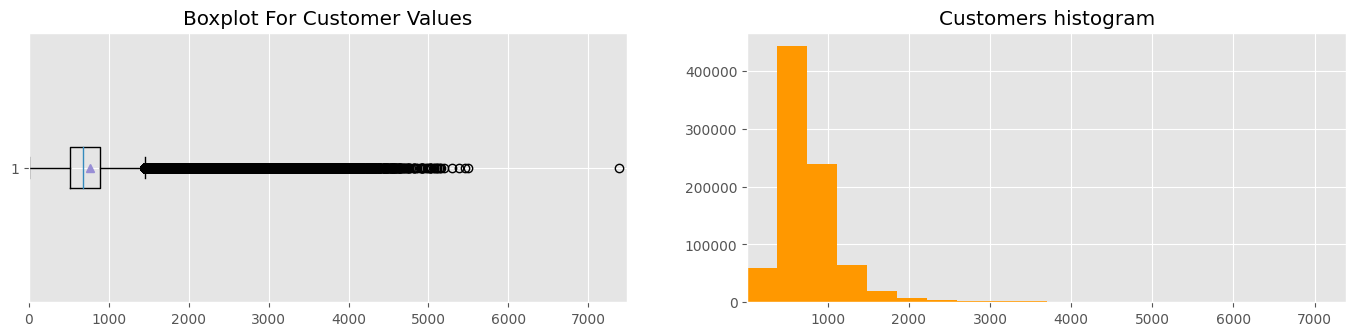

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(Train_df.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(Train_df["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(Train_df.Customers, cumulative=False, bins=20, color = '#FF9800')
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(Train_df.Customers), max(Train_df.Customers)))

{"Mean":np.mean(Train_df.Customers),"Median":np.median(Train_df.Customers)}

In [110]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(Train_df[Train_df.Customers>1500].count()[0]/Train_df.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(Train_df[Train_df.Customers==0].count()[0]/Train_df.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [111]:
Train_df[Train_df.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month
825160,817,2,2013-01-22,27190,7388,1,1,0,0,1


In [112]:
stats.pearsonr(Train_df.Customers, Train_df.Sales)[0]

0.823551720200022

<ipython-input-113-89337558e448>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_df.groupby(['Store'])['Customers'].mean(), color='#D24545')


<Axes: xlabel='Customers', ylabel='Density'>

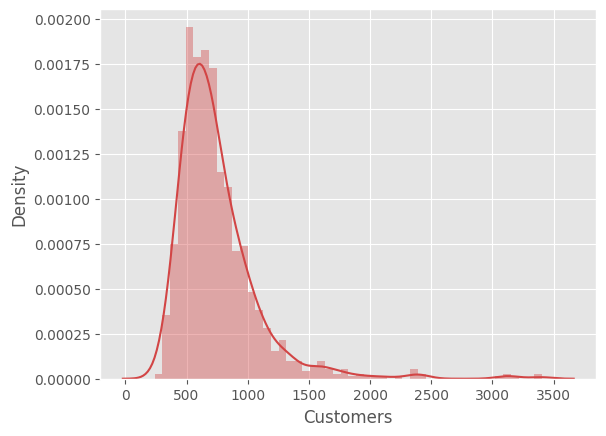

In [113]:
sns.distplot(Train_df.groupby(['Store'])['Customers'].mean(), color='#D24545')

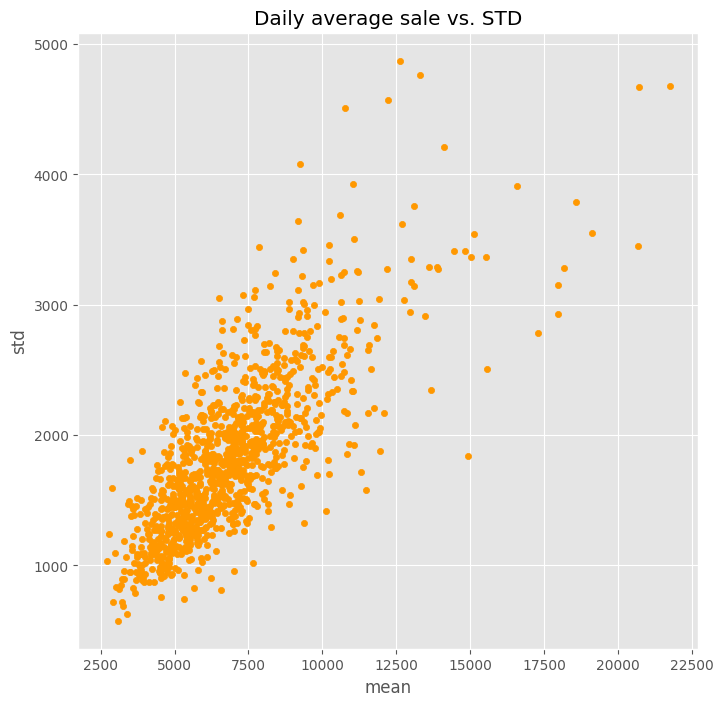

In [114]:
tmp = Train_df.groupby(['Store'])['Sales'].agg(['mean', 'std']).sort_values('mean')
tmp.plot.scatter('mean', 'std', figsize=(8,8), color = '#FF9800')
plt.title('Daily average sale vs. STD');

###A closer look at the Store dataset

In [115]:
Store_df.count(0)/Store_df.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [116]:
Store_df[pd.isnull(Store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

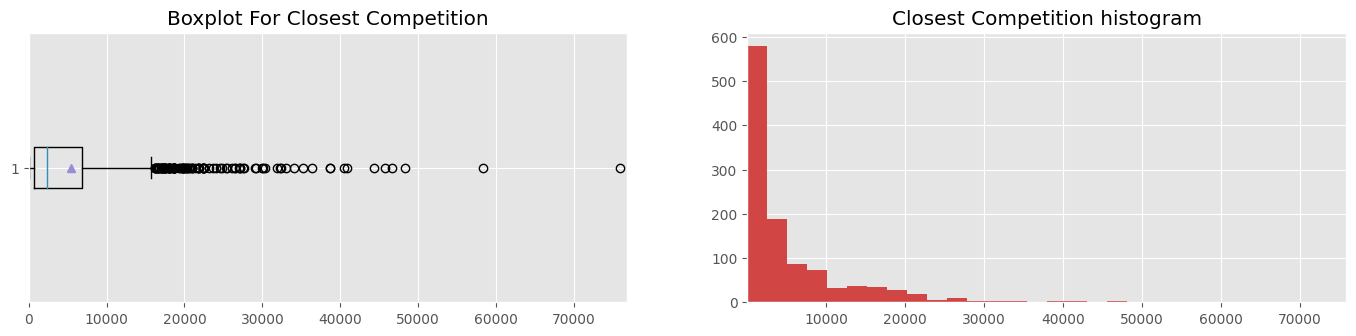

In [117]:
df_store_check_distribution=Store_df.drop(Store_df[pd.isnull(Store_df.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30, color='#D24545')
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(Store_df.CompetitionDistance),"Median":np.nanmedian(Store_df.CompetitionDistance),"Standard Dev":np.nanstd(Store_df.CompetitionDistance)}

In [118]:
Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance'].median(), inplace = True)

In [119]:
Store_df.CompetitionOpenSinceMonth.fillna(0, inplace = True)
Store_df.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [120]:
Store_df.Promo2SinceWeek.fillna(0,inplace=True)
Store_df.Promo2SinceYear.fillna(0,inplace=True)
Store_df.PromoInterval.fillna(0,inplace=True)

In [121]:
Store_df.count(0)/Store_df.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

In [122]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(Train_df, Store_df, how = 'left', on = 'Store')
df_train_store.head()
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1])))

The Train_Store dataset has 844338 Rows and 19 Variables


In [123]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [124]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,7,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


<ipython-input-125-b451bd99fe4f>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-125-b451bd99fe4f>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-125-b451bd99fe4f>:13: FutureWarning: The default valu

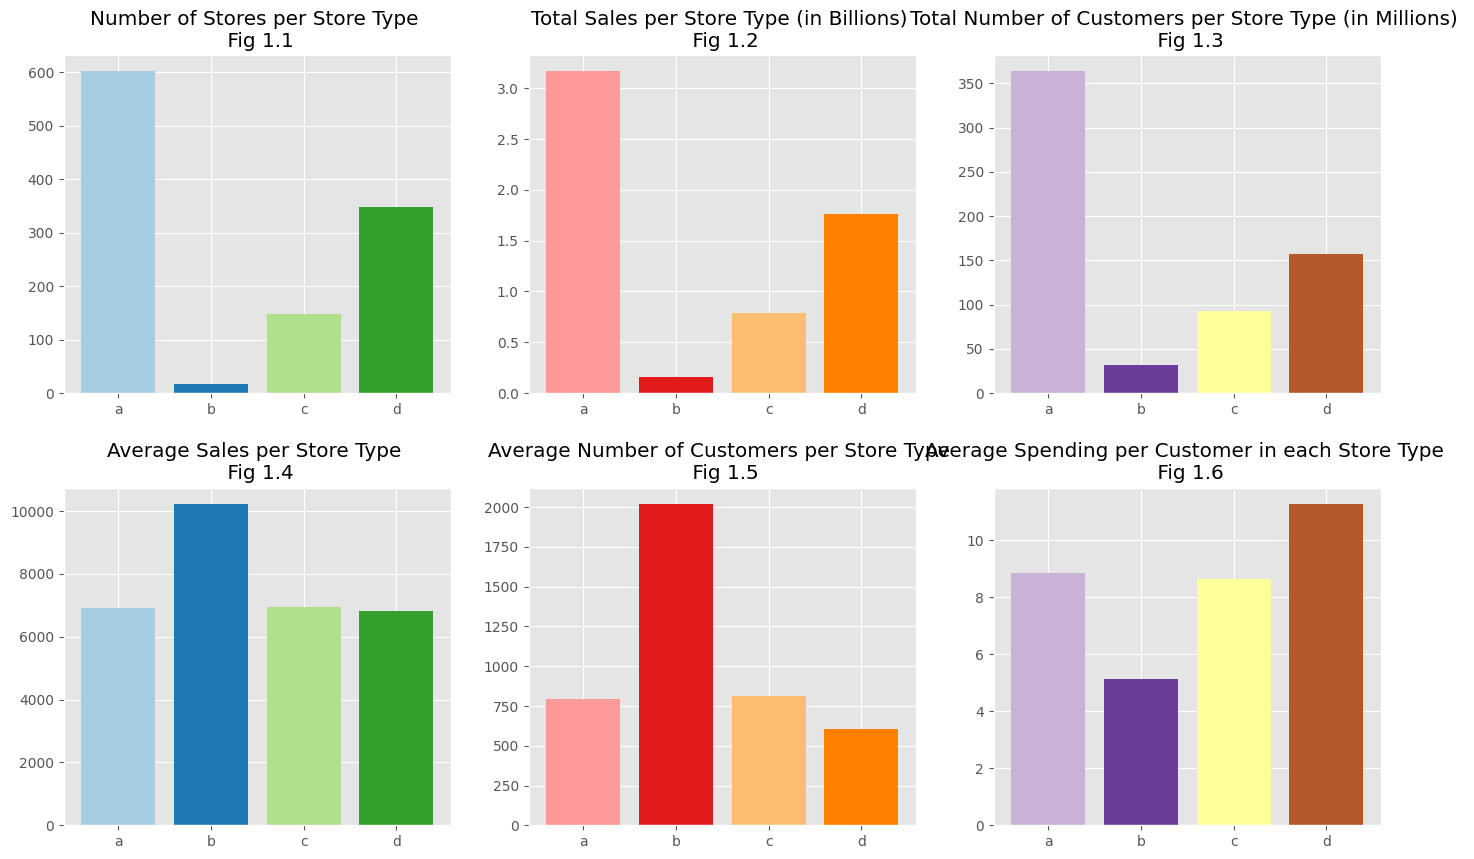

In [125]:
#Create an independent color scheme
#.cycle ensures that we don't run out of colors and start again with the first color after using the last color.
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette("Paired"))
#Use the subplots_adjust method to adjust subplot parameters, hspace: specify the vertical distance between subplots
plt.subplots_adjust(hspace = 0.28)
#groupby function is to group data according to columns
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(Store_df.groupby(by="StoreType").count().Store.index,Store_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

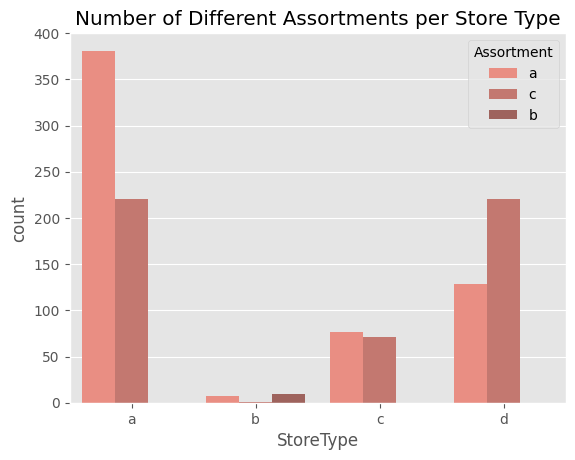

In [126]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=Store_df,palette=sns.color_palette("dark:salmon_r")).set_title("Number of Different Assortments per Store Type")
Store_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

In [127]:
# Convert 'Date' column to datetime type
df_train_store['Date'] = pd.to_datetime(df_train_store['Date'])
# Extract month and year from 'Date' column
df_train_store['Month'] = df_train_store['Date'].dt.month
df_train_store['Year'] = df_train_store['Date'].dt.year

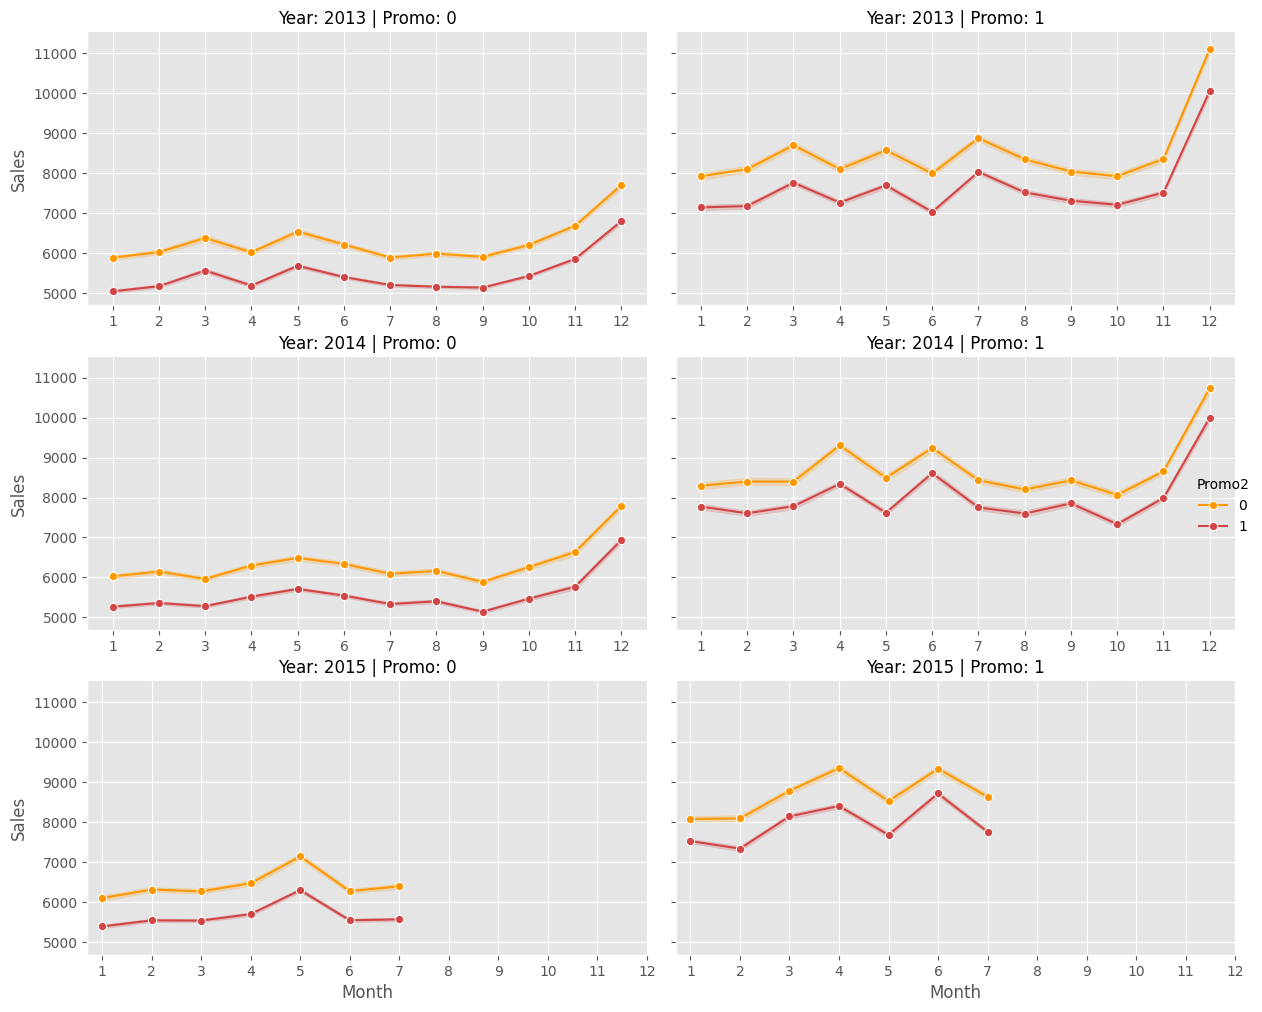

In [128]:
# Convert "Month" column to integers
df_train_store["Month"] = df_train_store["Month"].astype(int)
# Get unique values in the "Promo" column
promo_values = df_train_store["Promo"].unique()

# Create a FacetGrid with adjusted height and aspect ratio and set the colors
g = sns.FacetGrid(df_train_store, col="Promo", hue="Promo2", row="Year", sharex=False, height=4, aspect=1.5,
                  palette={promo_values[0]: "#D24545", promo_values[1]: "#FF9800"})


# Use lineplot for each facet
g.map(sns.lineplot, "Month", "Sales", marker="o")

# Add legend
g.add_legend()

# Set titles for each facet
g.set_titles(row_template='Year: {row_name}', col_template='Promo: {col_name}')

# Set custom x-axis tick labels for each facet
month_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
for ax in g.axes.flat:
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_labels)
# Adjust the layout
plt.tight_layout()
# Adjust the margin at the bottom of each subplot
plt.subplots_adjust(bottom=0.2)
# Show the plot
plt.show()

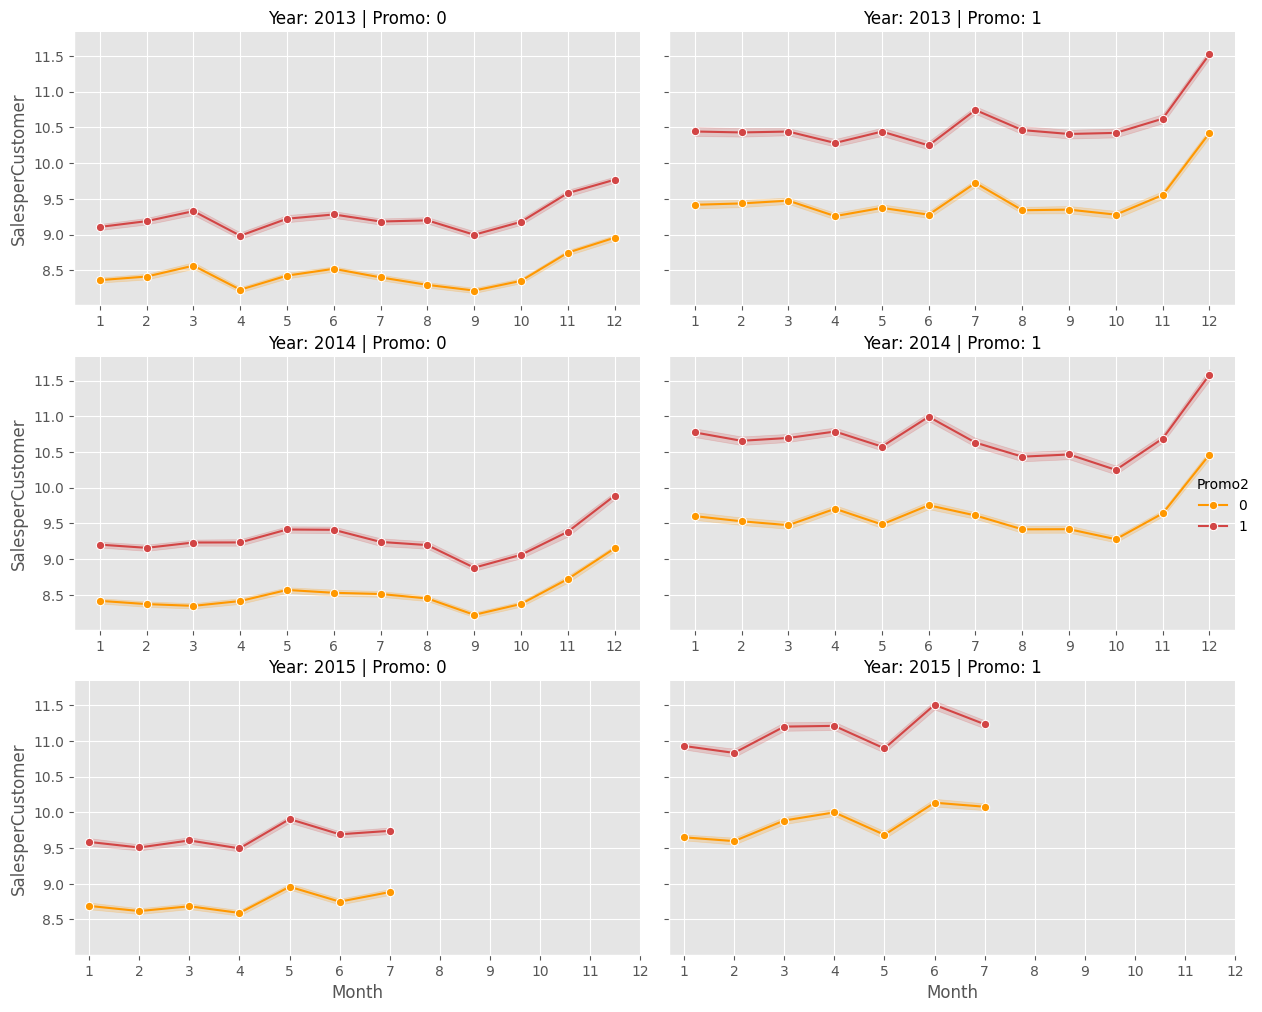

In [129]:
# Convert "Month" column to integers
df_train_store["Month"] = df_train_store["Month"].astype(int)
# Get unique values in the "Promo" column
promo_values = df_train_store["Promo"].unique()

# Create a FacetGrid with adjusted height and aspect ratio and set the colors
g = sns.FacetGrid(df_train_store, col="Promo", hue="Promo2", row="Year", sharex=False, height=4, aspect=1.5,
                  palette={promo_values[0]: "#D24545", promo_values[1]: "#FF9800"})

# Use lineplot for each facet
g.map(sns.lineplot, "Month", "SalesperCustomer", marker="o")

# Add legend
g.add_legend()

# Set titles for each facet
g.set_titles(row_template='Year: {row_name}', col_template='Promo: {col_name}')

# Set custom x-axis tick labels for each facet
month_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
for ax in g.axes.flat:
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_labels)
# Adjust the layout
plt.tight_layout()
# Adjust the margin at the bottom of each subplot
plt.subplots_adjust(bottom=0.2)
# Show the plot
plt.show()

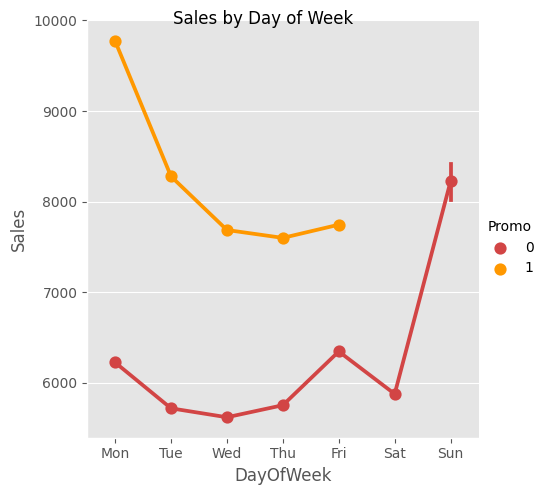

In [130]:
# Create a catplot with custom colors
g = sns.catplot(data=df_train_store, x="DayOfWeek", y="Sales", hue="Promo", sharex=False, kind="point",
                palette={0: "#D24545", 1: "#FF9800"})

# Set x-axis labels
g.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Set plot title
g.fig.suptitle("Sales by Day of Week")

# Show the plot
plt.show()

In [131]:
print ("Number of Stores opened on Sundays:{}" .format(df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


In [132]:
df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 5)

In [133]:
df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     6957.360876
 (15188.0, 30356.0]    7041.604692
 (30356.0, 45524.0]    6471.923562
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64,
 CompetitionDist_Cat
 (-55.84, 15188.0]     771.345223
 (15188.0, 30356.0]    691.574605
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)

In [134]:
df_train_store['Day']=df_train_store.Date.dt.day

In [135]:
df_train_store['StoreType'].isnull().any(),df_train_store['Assortment'].isnull().any(),df_train_store['StateHoliday'].isnull().any()

(False, False, False)

In [136]:
df_train_store["StoreType"].value_counts(),df_train_store["Assortment"].value_counts(),df_train_store["StateHoliday"].value_counts()

(a    457042
 d    258768
 c    112968
 b     15560
 Name: StoreType, dtype: int64,
 a    444875
 c    391254
 b      8209
 Name: Assortment, dtype: int64,
 0    731308
 0    112120
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64)

In [137]:
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [138]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes

In [139]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

In [140]:
df_train_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                       category
SchoolHoliday                         int64
Month                                 int64
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                      category
SalesperCustomer                    float64
Year                                  int64
CompetitionDist_Cat                category
Day                             

In [141]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,...,Promo2SinceYear,PromoInterval,SalesperCustomer,Year,CompetitionDist_Cat,Day,StateHoliday_cat,Assortment_cat,StoreType_cat,PromoInterval_cat
0,1,5,2015-07-31,5263,555,1,1,0,1,7,...,0.0,0,9.482883,2015,"(-55.84, 15188.0]",31,1.0,0.0,2.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,7,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,2015,"(-55.84, 15188.0]",31,1.0,0.0,0.0,2.0
2,3,5,2015-07-31,8314,821,1,1,0,1,7,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,2015,"(-55.84, 15188.0]",31,1.0,0.0,0.0,2.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,...,0.0,0,9.342457,2015,"(-55.84, 15188.0]",31,1.0,2.0,2.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,7,...,0.0,0,8.626118,2015,"(15188.0, 30356.0]",31,1.0,0.0,0.0,0.0


Correlation Analysis

In [142]:
df_correlation=df_train_store[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'SalesperCustomer', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear',  'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat']]

In [143]:
df_correlation=df_correlation.drop('Open', axis = 1)

<ipython-input-144-f794124d7d08>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)


<Axes: >

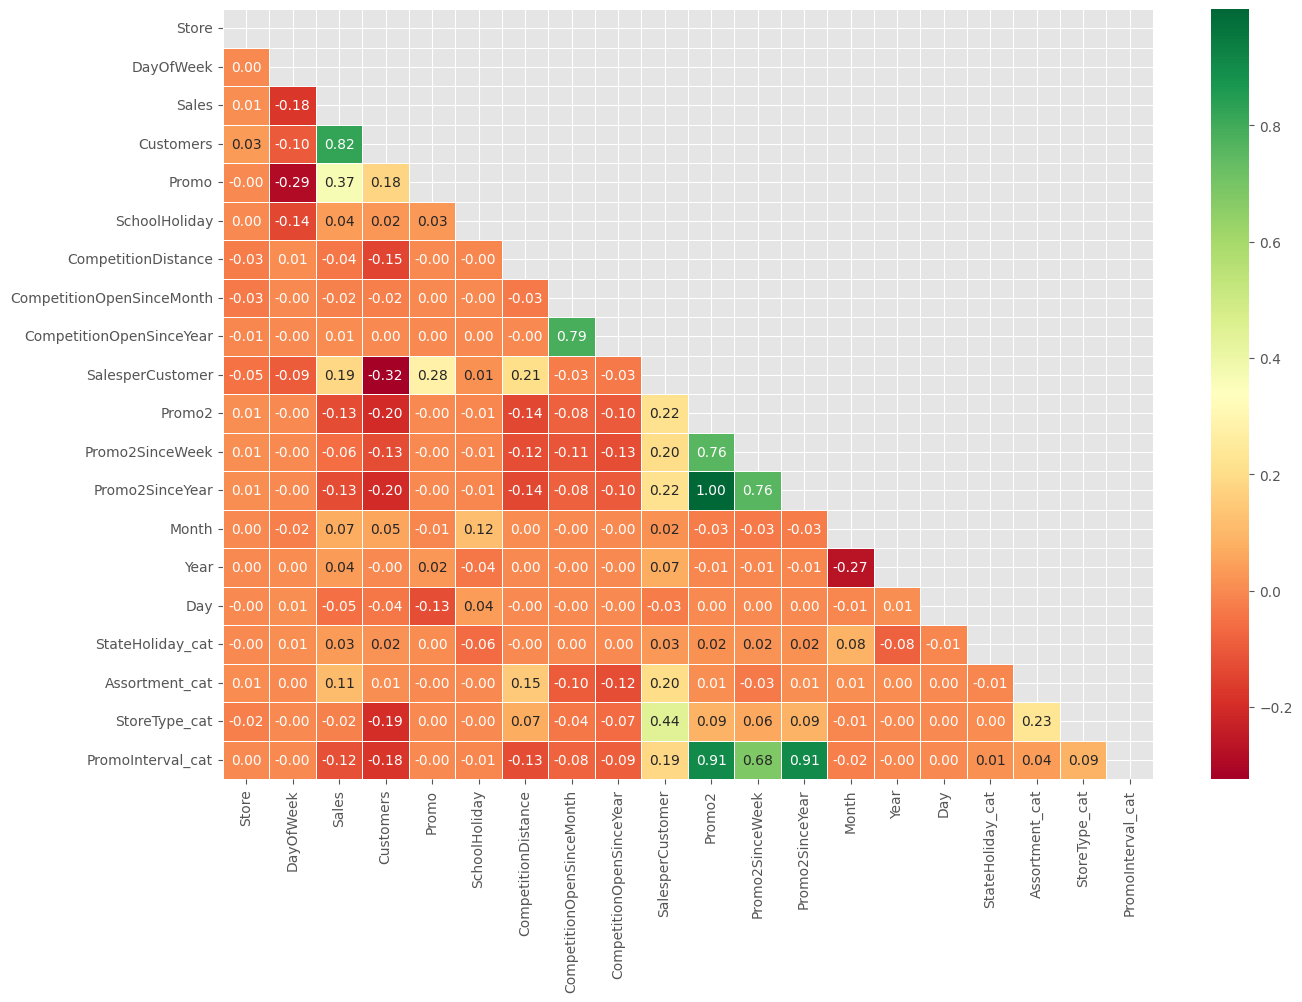

In [144]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
# Create the heatmap with custom color
sns.heatmap(df_correlation.corr(), ax=ax, mask=upper_triangle, annot=True, fmt='.2f', linewidths=0.5, cmap="RdYlGn")

##Forecast

In [145]:
def train_data_store(storeID, df= df_train_store):
    """
    For a given store, return the daily sales
    formated for prophet
    """
    condition = df.Store==storeID
    data = df[condition][['Date', 'Sales']].rename(
        columns={ # Rename columns to meet needs of the prophet
            'Date': 'ds',
            'Sales': 'y'
        }
    ).sort_values('ds')
    return data

In [146]:
def RMSPE(y, yhat):
    return np.sqrt(((y - yhat).div(y) ** 2).sum() / len(y))

In [147]:
def fit_prophet_for_store(storeID=1, train_ratio=0.8, holidays=None):

    data = train_data_store(storeID)

    N = int(np.floor(train_ratio * data.shape[0]))
    print("Training on {}% of the data = {} entries".format(
        train_ratio, N
    ))

    prophet = Prophet(interval_width = 0.95, holidays = holidays)
    prophet.fit(data[:N])

    return prophet, data, N

In [148]:
storeID=1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4w5l1or/ed5zycev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4w5l1or/eh62wk85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22853', 'data', 'file=/tmp/tmpj4w5l1or/ed5zycev.json', 'init=/tmp/tmpj4w5l1or/eh62wk85.json', 'output', 'file=/tmp/tmpj4w5l1or/prophet_modelabmq2rdp/prophet_model-20240115120806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training on 0.9% of the data = 702 entries


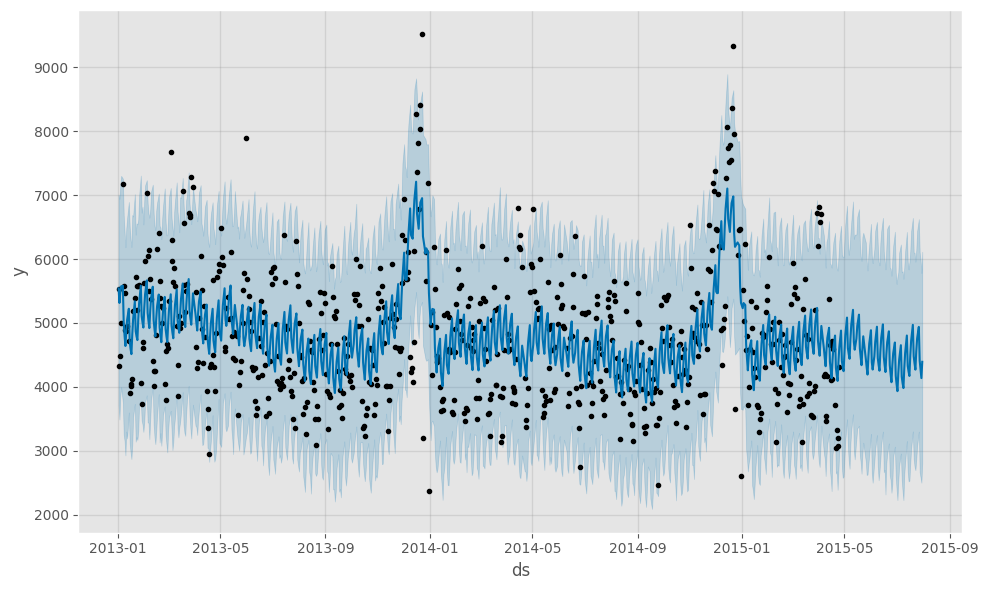

In [149]:
prophet, data, N = fit_prophet_for_store(storeID=storeID, train_ratio=0.9)
df_sub = pd.DataFrame(prophet.predict(data))
prophet.plot(prophet.predict(data));

In [150]:
RMSPE(data[N:]['y'].values, prophet.predict(data[N:])['yhat'])

0.1670179042584019

In [151]:
stateHolidaysDates = df_train_store[df_train_store.StateHoliday.isin(['a', 'b', 'c'])]['Date'].unique()
schoolHolidaysDates = df_train_store[df_train_store.SchoolHoliday=='1']['Date'].unique()
holidays = pd.concat(
    [
        pd.DataFrame({
            'holiday': 'state',
            'ds': stateHolidaysDates
        }),
        pd.DataFrame({
            'holiday': 'school',
            'ds': schoolHolidaysDates
        })
    ]
)
holidays.sample(5)

,holiday,ds
14,state,2014-06-09
4,state,2015-04-06
16,state,2014-05-01
26,state,2013-08-15
34,state,2013-01-01


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4w5l1or/3720t9pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4w5l1or/dmyn67x6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48861', 'data', 'file=/tmp/tmpj4w5l1or/3720t9pv.json', 'init=/tmp/tmpj4w5l1or/dmyn67x6.json', 'output', 'file=/tmp/tmpj4w5l1or/prophet_modelarouuv77/prophet_model-20240115120807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training on 0.9% of the data = 702 entries


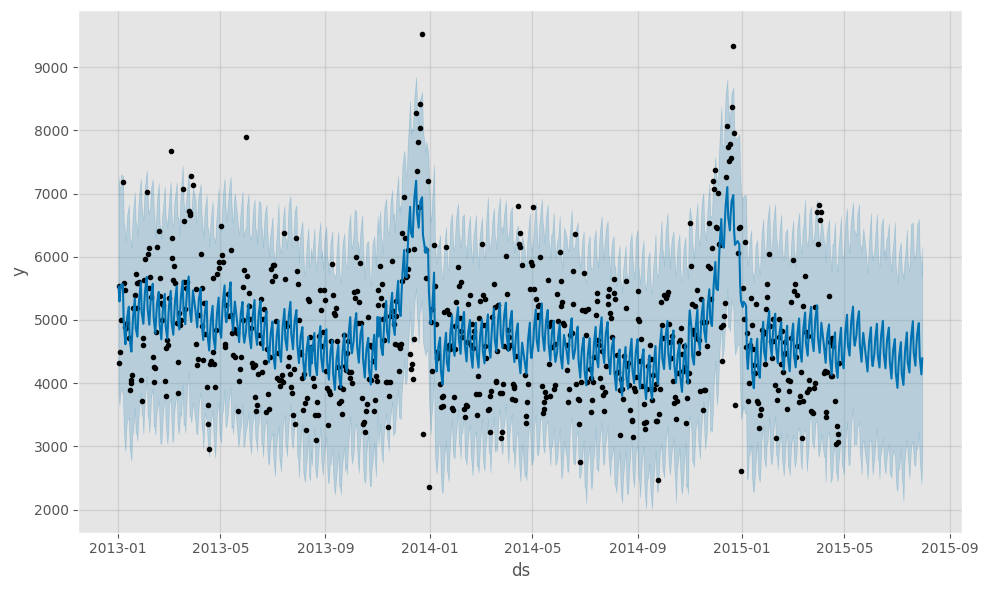

In [152]:
prophet, data, N = fit_prophet_for_store(storeID=storeID, train_ratio=0.9, holidays=holidays)
prophet.plot(prophet.predict(data));

In [153]:
prophet.predict(data)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5257.026360,3741.154691,7230.548117,5257.026360,5257.026360,275.760913,275.760913,275.760913,0.0,...,-224.432986,-224.432986,-224.432986,500.193899,500.193899,500.193899,0.0,0.0,0.0,5532.787273
1,2013-01-03,5255.437252,3646.364423,6913.597056,5255.437252,5255.437252,38.322566,38.322566,38.322566,0.0,...,-330.434170,-330.434170,-330.434170,368.756736,368.756736,368.756736,0.0,0.0,0.0,5293.759819
2,2013-01-04,5253.848145,3825.693127,7131.177376,5253.848145,5253.848145,202.812066,202.812066,202.812066,0.0,...,-41.129655,-41.129655,-41.129655,243.941720,243.941720,243.941720,0.0,0.0,0.0,5456.660210
3,2013-01-05,5252.259037,3984.787852,7257.313847,5252.259037,5252.259037,304.534712,304.534712,304.534712,0.0,...,177.315544,177.315544,177.315544,127.219168,127.219168,127.219168,0.0,0.0,0.0,5556.793749
4,2013-01-07,5249.080822,3910.850106,7331.782503,5249.080822,5249.080822,316.328591,316.328591,316.328591,0.0,...,393.367132,393.367132,393.367132,-77.038541,-77.038541,-77.038541,0.0,0.0,0.0,5565.409413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2015-07-27,4650.749510,3210.316417,6756.017895,4637.245876,4666.018228,300.147346,300.147346,300.147346,0.0,...,393.367132,393.367132,393.367132,-93.219786,-93.219786,-93.219786,0.0,0.0,0.0,4950.896856
777,2015-07-28,4650.617463,2875.546485,6064.703450,4636.937818,4666.119184,-228.792714,-228.792714,-228.792714,0.0,...,-110.579979,-110.579979,-110.579979,-118.212735,-118.212735,-118.212735,0.0,0.0,0.0,4421.824748
778,2015-07-29,4650.485415,2674.548863,5979.592668,4636.873084,4666.239273,-371.802235,-371.802235,-371.802235,0.0,...,-224.432986,-224.432986,-224.432986,-147.369249,-147.369249,-147.369249,0.0,0.0,0.0,4278.683180
779,2015-07-30,4650.353368,2511.517244,5701.230583,4636.513236,4666.346128,-510.473503,-510.473503,-510.473503,0.0,...,-330.434170,-330.434170,-330.434170,-180.039333,-180.039333,-180.039333,0.0,0.0,0.0,4139.879865


In [154]:
Prediction_accuracy = 1 - RMSPE(data[N:]['y'].values, prophet.predict(data[N:])['yhat'])
print(Prediction_accuracy*100)

83.23673605021527
